### SMS Spam Classification with Sentence-BERT Embeddings and Multiple Scikit-learn Models

This code performs SMS spam classification using the SMSSpamCollection dataset. It compares two pretrained Sentence-BERT models for text embeddings and evaluates multiple classifiers from scikit-learn.

#### Dataset

* The dataset is loaded from a tab-separated file `SMSSpamCollection`.
* It contains two columns: `label` (either "ham" or "spam") and `text` (the message content).
* Labels are converted to numeric format: `ham` → 0, `spam` → 1.

#### Train/Test Split

* The dataset is split into training and testing sets (80%/20%).

#### Sentence Embeddings

* Two pretrained Sentence-BERT models from the `sentence-transformers` library are used to generate vector representations for each SMS message:

  * `all-MiniLM-L6-v2`: a lightweight and fast model.
  * `paraphrase-MiniLM-L12-v2`: a more accurate but slightly heavier model.
* Each message is encoded into a dense numerical vector using the respective model.

#### Classifiers Evaluated

For each embedding model, the following scikit-learn classifiers are trained and evaluated:

1. RandomForestClassifier
2. GradientBoostingClassifier
3. LogisticRegression
4. KNeighborsClassifier
5. SVC (Support Vector Machine with RBF kernel)

#### Evaluation

* Each classifier is trained on the embedded training data and tested on the embedded test data.
* The `classification_report` from scikit-learn is printed, showing precision, recall, F1-score, and support for both classes (ham and spam).

#### Purpose

This setup allows for a direct comparison between different embedding strategies (MiniLM vs. Paraphrase MiniLM) and classification algorithms, with the goal of identifying the best combination for spam detection on short-text datasets like SMS.

# SMS Spam Collection Dataset – Overview

The **SMS Spam Collection Dataset** is a publicly available dataset for text classification and natural language processing tasks, especially **spam detection** in mobile SMS messages.

---

## Dataset Description

- **Name:** SMSSpamCollection  
- **Size:** Approximately 5,500 messages  
- **Format:** Tab-separated (`\t`) text file  
- **Columns:**
  - `label`: The message label – either `ham` (legitimate) or `spam`
  - `message`: The actual SMS text content

---

## Sample Data
ham - Go until jurong point, crazy.. Available only in bugis n great world la e buffet...

spam - WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!

---

## Class Distribution

- **Ham (not spam):** Around 4,825 messages  
- **Spam:** Around 747 messages  
- The dataset is **imbalanced**, with ham messages being the majority class.

---

## Usage Tips

- It is recommended to clean and preprocess the text:
  - Lowercasing
  - Removing punctuation
  - Tokenization or lemmatization
- To handle class imbalance, consider:
  - Undersampling the majority class
  - Oversampling the minority class
  - Using SMOTE or similar techniques
---

## Source

- UCI Machine Learning Repository:  
  https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

---

## Goals

This dataset is commonly used for:

- Training and evaluating spam classifiers  
- Learning NLP preprocessing workflows  
- Experimenting with feature extraction techniques (TF-IDF, embeddings, etc.)

---

## Example Workflow

1. Load and inspect the dataset  
2. Preprocess the text data  
3. Convert text into features  
4. Train classification models  
5. Evaluate using metrics like accuracy, precision, recall, F1-score  
6. Optionally apply explainability tools like SHAP or LIME

---

This dataset is an excellent starting point for learning text classification and building real-world spam detection systems.


In [ ]:
# === Download and Extract the SMS Spam dataset ===
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

--2025-07-15 06:28:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip.1’

smsspamcollection.z     [   <=>              ] 198.65K   302KB/s    in 0.7s    

2025-07-15 06:28:21 (302 KB/s) - ‘smsspamcollection.zip.1’ saved [203415]

Archive:  smsspamcollection.zip
replace SMSSpamCollection? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace readme? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Data Exploration and Analysis

In [ ]:
# Install required library
!pip install gensim
!pip install -U sentence-transformers
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


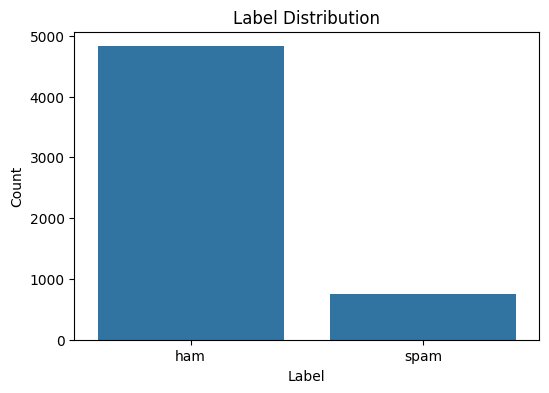

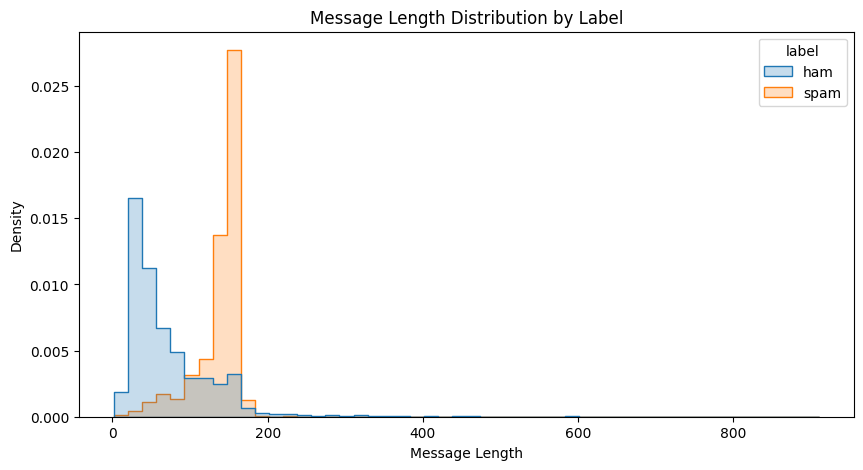

        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0


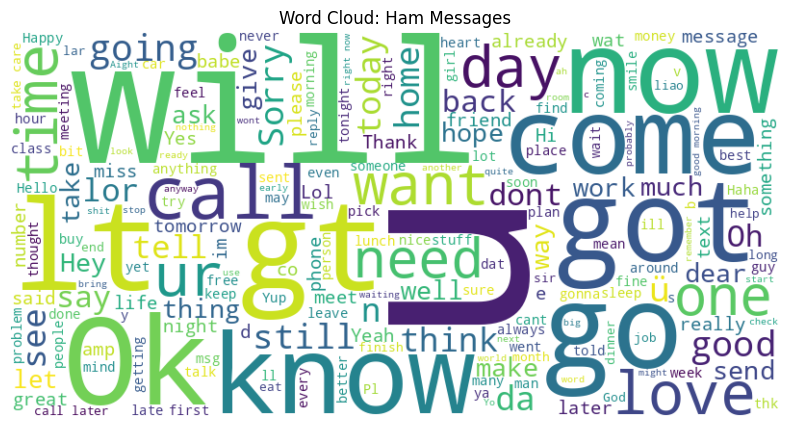

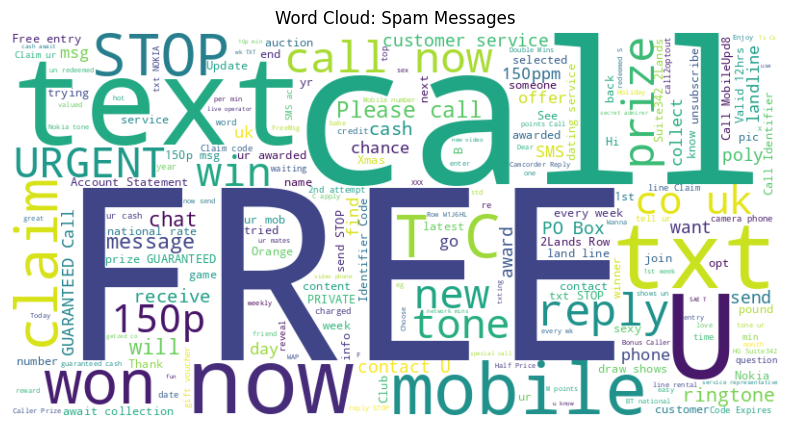

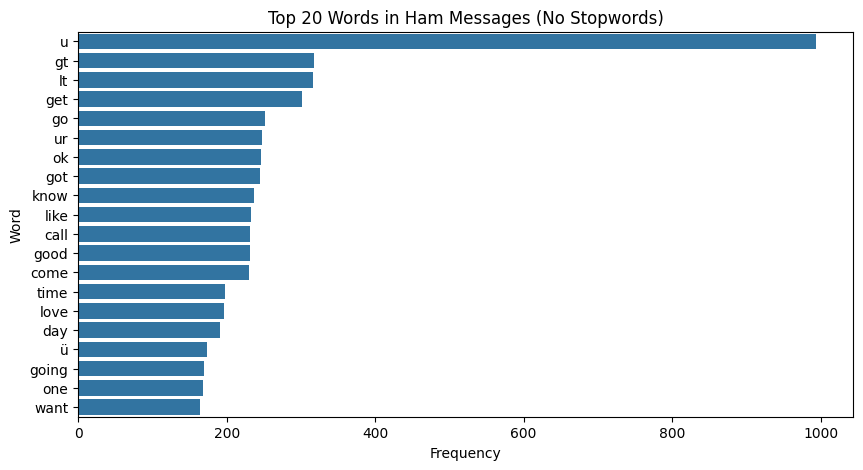

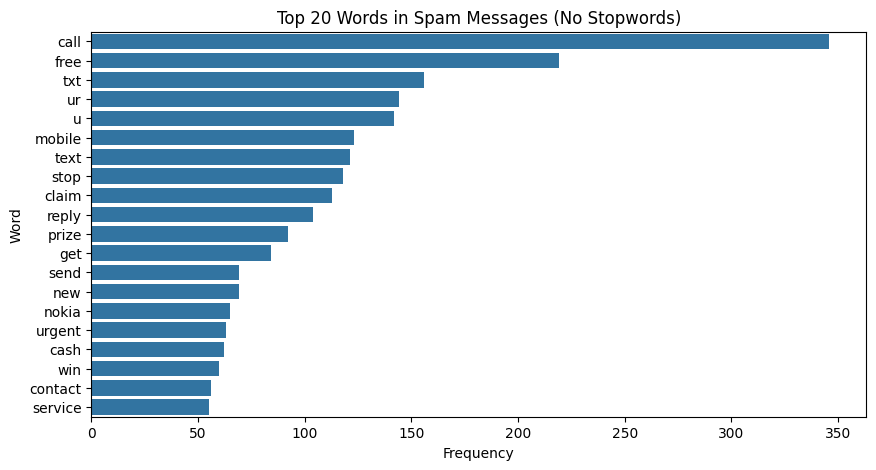

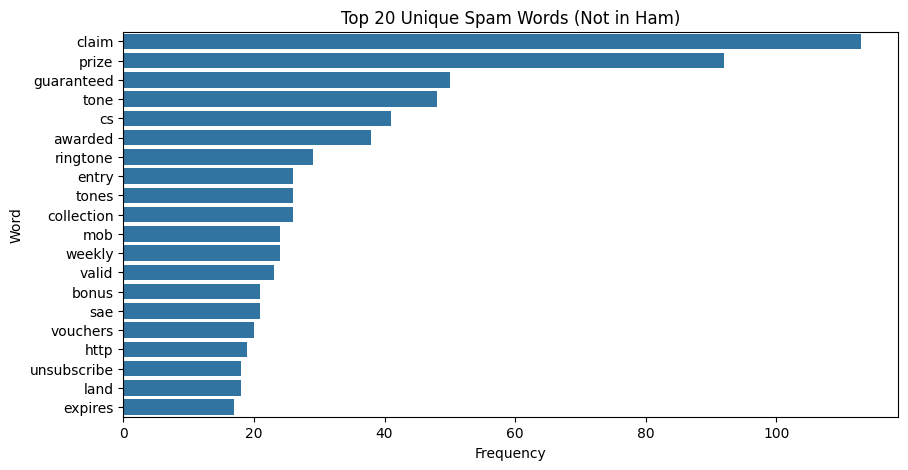

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from collections import Counter
import string



# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Display first few rows
print(df.head())

# Label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Add message length column
df['length'] = df['message'].apply(len)

# Message length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='length', bins=50, hue='label', element='step', stat='density', common_norm=False)
plt.title("Message Length Distribution by Label")
plt.xlabel("Message Length")
plt.ylabel("Density")
plt.show()

# Descriptive statistics of message length
print(df.groupby('label')['length'].describe())

# Word cloud generator
def generate_wordcloud(messages, title):
    all_text = ' '.join(messages)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for ham and spam messages
generate_wordcloud(df[df['label'] == 'ham']['message'], 'Word Cloud: Ham Messages')
generate_wordcloud(df[df['label'] == 'spam']['message'], 'Word Cloud: Spam Messages')

# Most common words per label (excluding stopwords)
def plot_top_words(texts, label_name):
    tokens = []
    for msg in texts:
        words = nltk.word_tokenize(msg.lower())
        words = [w for w in words if w.isalpha() and w not in string.punctuation and w not in stop_words]
        tokens.extend(words)
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top 20 Words in {label_name} Messages (No Stopwords)")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

# Unique spam words not appearing in ham, excluding stopwords
def plot_unique_spam_words(spam_texts, ham_texts):
    spam_tokens = []
    ham_tokens = []

    for msg in spam_texts:
        words = nltk.word_tokenize(msg.lower())
        words = [w for w in words if w.isalpha() and w not in stop_words]
        spam_tokens.extend(words)

    for msg in ham_texts:
        words = nltk.word_tokenize(msg.lower())
        words = [w for w in words if w.isalpha() and w not in stop_words]
        ham_tokens.extend(words)

    spam_set = set(spam_tokens)
    ham_set = set(ham_tokens)

    unique_spam_words = spam_set - ham_set
    filtered_spam_tokens = [w for w in spam_tokens if w in unique_spam_words]

    counter = Counter(filtered_spam_tokens)
    top_unique_spam = counter.most_common(20)

    if top_unique_spam:
        words, counts = zip(*top_unique_spam)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(counts), y=list(words))
        plt.title("Top 20 Unique Spam Words (Not in Ham)")
        plt.xlabel("Frequency")
        plt.ylabel("Word")
        plt.show()
    else:
        print("No unique spam words found.")


# Plot top words in ham and spam
plot_top_words(df[df['label'] == 'ham']['message'], "Ham")
plot_top_words(df[df['label'] == 'spam']['message'], "Spam")
# Run the function
plot_unique_spam_words(df[df['label'] == 'spam']['message'], df[df['label'] == 'ham']['message'])


# Compare two pretrained Sentence-BERT models for text embeddings and evaluates multiple classifiers from scikit-learn

In [ ]:
# === Imports ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


# === Load Dataset ===
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=["label", "text"])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# === Define Models to Evaluate ===
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM_RBF": SVC(kernel='rbf')
}

# === Embedding Models to Compare ===
embedding_models = {
    "MiniLM-L6-v2": 'all-MiniLM-L6-v2',
    "MiniLM-L12-v2": 'paraphrase-MiniLM-L12-v2'
}

# === Loop through embedding models and classifiers ===
for embed_name, embed_model_name in embedding_models.items():
    print(f"\n\n==== Embedding: {embed_name} ====")
    embedder = SentenceTransformer(embed_model_name)

    print("Encoding training texts...")
    X_train_vec = embedder.encode(X_train_texts.tolist(), show_progress_bar=True)
    print("Encoding test texts...")
    X_test_vec = embedder.encode(X_test_texts.tolist(), show_progress_bar=True)

    for name, model in models.items():
        print(f"\n--- Model: {name} ---")
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        print(classification_report(y_test, y_pred))




==== Embedding: MiniLM-L6-v2 ====
Encoding training texts...


Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Encoding test texts...


Batches:   0%|          | 0/35 [00:00<?, ?it/s]


--- Model: RandomForest ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


--- Model: GradientBoosting ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.88      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115


--- Model: LogisticRegression ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Encoding test texts...


Batches:   0%|          | 0/35 [00:00<?, ?it/s]


--- Model: RandomForest ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


--- Model: GradientBoosting ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


--- Model: LogisticRegression ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.